Objective :-  Analyze the bird strikes during phase of flight between year 2000 to 2011  and study the some cases.

# >> Requirements

Programming language:- python version 3.7.0 or greater

Code Editor/IDE:- Jupyter Notebook

System :- windows 32bit/64bit

software and libraries :- plolty,seaborn,matplotlib,pandas,numpy

In [10]:
# Firstly You Have Install necessary libraries that we will use in this data analysis project
"""Install Libraries Using pip"""
# pip install plotly
# pip install seaborn
# pip install matplotlib
# pip install pandas
# pip install numpy

'Install Libraries Using pip'

Import necessary libraries

In [11]:
import plotly.express as px 
import matplotlib.pyplot as plt
import seaborn as sb
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import pandas as pd

# >> Data Collection

Load The Dataset

We Already have bird_strike_dataset_2000_2011. we will load this dataset directly in our notebook using pandas

In [12]:
# Load Amazon Sales DataSet Using pandas
# Replace with the original path of your dataset
BirdStrike = pd.read_csv("D:\\UnifiedMentorInternship\Bird Strikes data.xlsx - Bird Strikes.csv")

In [13]:
#  Show first 5 values of Dataset
BirdStrike.head(5)

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,Effect: Impact to flight,FlightDate,Effect: Indicated Damage,...,Remains of wildlife sent to Smithsonian,Remarks,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,Engine Shut Down,11/23/00 0:00,Caused damage,...,False,FLT 753. PILOT REPTD A HUNDRED BIRDS ON UNKN T...,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,NaN,7/25/01 0:00,Caused damage,...,False,102 CARCASSES FOUND. 1 LDG LIGHT ON NOSE GEAR ...,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,NaN,9/14/01 0:00,No damage,...,False,FLEW UNDER A VERY LARGE FLOCK OF BIRDS OVER AP...,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,Precautionary Landing,9/5/02 0:00,No damage,...,False,"NOTAM WARNING. 26 BIRDS HIT THE A/C, FORCING A...",Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,NaN,6/23/03 0:00,No damage,...,False,NO DMG REPTD.,Small,No Cloud,European starling,N,0,50,0,No


In [14]:
# Show Columns Of DataFrame
BirdStrike.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'Effect: Impact to flight',
       'FlightDate', 'Effect: Indicated Damage',
       'Aircraft: Number of engines?', 'Aircraft: Airline/Operator',
       'Origin State', 'When: Phase of flight', 'Conditions: Precipitation',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Remarks', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?'],
      dtype='object')

In [15]:
 # Check DataType of every column to understand the structure of our DataFrame  
BirdStrike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25558 entries, 0 to 25557
Data columns (total 26 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Record ID                                25558 non-null  int64 
 1   Aircraft: Type                           25429 non-null  object
 2   Airport: Name                            25429 non-null  object
 3   Altitude bin                             25429 non-null  object
 4   Aircraft: Make/Model                     25558 non-null  object
 5   Wildlife: Number struck                  25429 non-null  object
 6   Wildlife: Number Struck Actual           25558 non-null  int64 
 7   Effect: Impact to flight                 2078 non-null   object
 8   FlightDate                               25429 non-null  object
 9   Effect: Indicated Damage                 25558 non-null  object
 10  Aircraft: Number of engines?             25291 non-null  o

In [16]:
 # Take A look on dataFrame  numerical columns to understand basics Summery like count,mean,min,max  of each column etc.
BirdStrike.describe()

,Record ID,Wildlife: Number Struck Actual,Number of people injured
count,25558.000000,25558.000000,25558.000000
mean,253916.085609,2.691525,0.001056
std,38510.453382,12.793975,0.050420
min,1195.000000,1.000000,0.000000
25%,225783.750000,1.000000,0.000000
50%,248749.000000,1.000000,0.000000
75%,269168.750000,1.000000,0.000000
max,321909.000000,942.000000,6.000000


# >> Data Preprocessing

In [17]:
 # Check nan Values
 print("nan values In All Coulmn:-",BirdStrike.isna().sum())

nan values In All Coulmn:- Record ID                                      0
Aircraft: Type                               129
Airport: Name                                129
Altitude bin                                 129
Aircraft: Make/Model                           0
Wildlife: Number struck                      129
Wildlife: Number Struck Actual                 0
Effect: Impact to flight                   23480
FlightDate                                   129
Effect: Indicated Damage                       0
Aircraft: Number of engines?                 267
Aircraft: Airline/Operator                   129
Origin State                                 449
When: Phase of flight                        129
Conditions: Precipitation                  23543
Remains of wildlife collected?                 0
Remains of wildlife sent to Smithsonian        0
Remarks                                     4771
Wildlife: Size                               129
Conditions: Sky                           

In Above Dataset We can Clearly see that 4 columns (Effect: Impact to flight,Conditions: Precipitation,Remarks,Origin State) contain too much nan values so for now we will excludes this columns and process other data.In Above some columns also have total 129 nan in same row comapre to other some columns we will drop that row.

In [18]:
# Assign All Dataset To New variable
BirdStrikeOrg = BirdStrike.copy()

In [19]:
# Drop 4 Columns because they have alot of nan values that can impact on our analysis
BirdStrike = BirdStrike.drop(['Remarks','Effect: Impact to flight','Conditions: Precipitation'],axis=1)

In [20]:
BirdStrike['Feet above ground']

0        1,500
1            0
2           50
3           50
4           50
         ...  
25553    1,500
25554        0
25555      NaN
25556        0
25557        0
Name: Feet above ground, Length: 25558, dtype: object

In [21]:
# Print the dataset after droping columns
BirdStrike.head(5)

,Record ID,Aircraft: Type,Airport: Name,Altitude bin,Aircraft: Make/Model,Wildlife: Number struck,Wildlife: Number Struck Actual,FlightDate,Effect: Indicated Damage,Aircraft: Number of engines?,...,Remains of wildlife collected?,Remains of wildlife sent to Smithsonian,Wildlife: Size,Conditions: Sky,Wildlife: Species,Pilot warned of birds or wildlife?,Cost: Total $,Feet above ground,Number of people injured,Is Aircraft Large?
0,202152,Airplane,LAGUARDIA NY,> 1000 ft,B-737-400,Over 100,859,11/23/00 0:00,Caused damage,2,...,False,False,Medium,No Cloud,Unknown bird - medium,N,"30,736","1,500",0,Yes
1,208159,Airplane,DALLAS/FORT WORTH INTL ARPT,< 1000 ft,MD-80,Over 100,424,7/25/01 0:00,Caused damage,2,...,False,False,Small,Some Cloud,Rock pigeon,Y,0,0,0,No
2,207601,Airplane,LAKEFRONT AIRPORT,< 1000 ft,C-500,Over 100,261,9/14/01 0:00,No damage,2,...,False,False,Small,No Cloud,European starling,N,0,50,0,No
3,215953,Airplane,SEATTLE-TACOMA INTL,< 1000 ft,B-737-400,Over 100,806,9/5/02 0:00,No damage,2,...,True,False,Small,Some Cloud,European starling,Y,0,50,0,Yes
4,219878,Airplane,NORFOLK INTL,< 1000 ft,CL-RJ100/200,Over 100,942,6/23/03 0:00,No damage,2,...,False,False,Small,No Cloud,European starling,N,0,50,0,No


In [22]:
# drop nan from all columns
BirdStrike = BirdStrike.dropna()

In [23]:
# Check For Nan Values
BirdStrike.isna().sum()

# Check  Now we Have drop All row contains nan

Record ID                                  0
Aircraft: Type                             0
Airport: Name                              0
Altitude bin                               0
Aircraft: Make/Model                       0
Wildlife: Number struck                    0
Wildlife: Number Struck Actual             0
FlightDate                                 0
Effect: Indicated Damage                   0
Aircraft: Number of engines?               0
Aircraft: Airline/Operator                 0
Origin State                               0
When: Phase of flight                      0
Remains of wildlife collected?             0
Remains of wildlife sent to Smithsonian    0
Wildlife: Size                             0
Conditions: Sky                            0
Wildlife: Species                          0
Pilot warned of birds or wildlife?         0
Cost: Total $                              0
Feet above ground                          0
Number of people injured                   0
Is Aircraf

In [24]:
 # Check null Values
 print("Null values In All Coulmns:-",BirdStrike.isnull().sum())

Null values In All Coulmns:- Record ID                                  0
Aircraft: Type                             0
Airport: Name                              0
Altitude bin                               0
Aircraft: Make/Model                       0
Wildlife: Number struck                    0
Wildlife: Number Struck Actual             0
FlightDate                                 0
Effect: Indicated Damage                   0
Aircraft: Number of engines?               0
Aircraft: Airline/Operator                 0
Origin State                               0
When: Phase of flight                      0
Remains of wildlife collected?             0
Remains of wildlife sent to Smithsonian    0
Wildlife: Size                             0
Conditions: Sky                            0
Wildlife: Species                          0
Pilot warned of birds or wildlife?         0
Cost: Total $                              0
Feet above ground                          0
Number of people injured  

In [25]:
# Add new columns year and month from column FlightDate

# Convert  FlightDate column to datetime 

BirdStrike['FlightDate'] = pd.to_datetime(BirdStrike['FlightDate'])
# Now We will Create Three New Columns of Year, Month and yearMonth
BirdStrike['year'] = BirdStrike['FlightDate'].dt.year
BirdStrike['month'] = BirdStrike['FlightDate'].dt.month
BirdStrike['year_month'] = BirdStrike['FlightDate'].dt.to_period('M')

C:\Users\mishr\AppData\Local\Temp\ipykernel_25804\275944927.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  BirdStrike['FlightDate'] = pd.to_datetime(BirdStrike['FlightDate'])


 Note:- In the above cell avoid the warning.

In [26]:
print("Toatl Columns:- ",len(BirdStrike.columns))

Toatl Columns:-  26


In [27]:
# Convert month number to month name

BirdStrike['month'] = pd.to_datetime(BirdStrike['month'], format='%m').dt.month_name().str[:3]

In [28]:
# Change Object data type to String 
BirdStrikeOrg['Aircraft: Airline/Operator'] = BirdStrikeOrg['Aircraft: Airline/Operator'].astype(str)

# Change object to float
BirdStrike['Cost: Total $'] = BirdStrike['Cost: Total $'].astype(str).str.replace(",","").astype(int)

BirdStrike['Feet above ground'] = BirdStrike['Feet above ground'].astype(str).str.replace(",","").astype(int)


# >>Data Analysis and visualization


In [101]:
# Count the frequency of each month
print("Average bird strikes in US in each month over all the years :- ",BirdStrike['month'].value_counts().mean())

Average bird strikes in US in each month over all the years :-  2062.25


# ● Month-vise birdstrikes in US flight

In [102]:
#  value_counts() function will count the each month frequncy and month_vise will store data in dict. type

month_vise = {'month':BirdStrike['month'].value_counts().keys(),'BirdStrikes':BirdStrike['month'].value_counts().values}



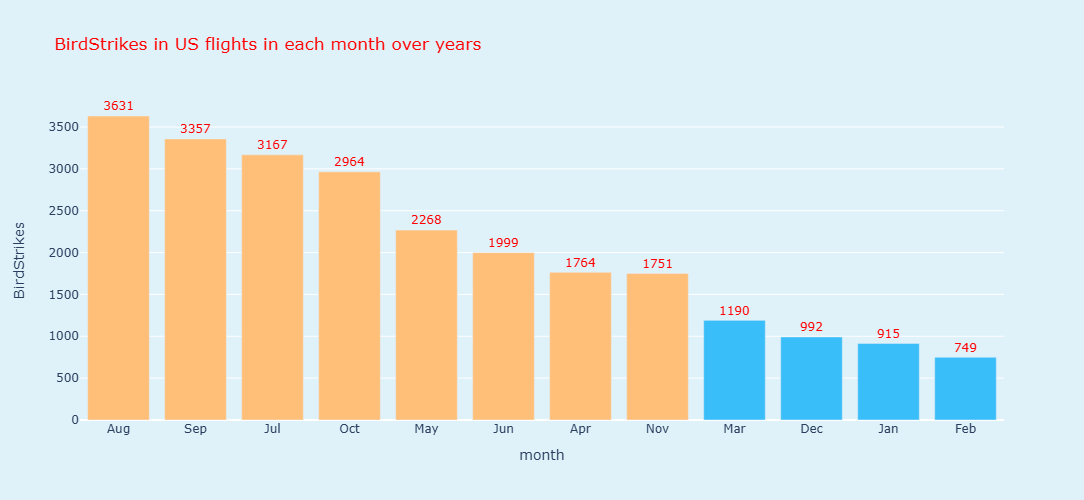

In [103]:

# set color to all markers
colors = ['#FFBF78',] * 12

# set Colors To loweset markers
colors[8:] = ['#3ABEF9']*4

# create bar chart

fig = px.bar(month_vise,x= 'month',y= 'BirdStrikes',height=500, text = 'BirdStrikes',title='BirdStrikes in US flights in each month over years')

# update text
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False,textfont=dict(color='red'),marker_color=colors)
# update layout
fig.update_layout(paper_bgcolor = '#dff2fa',plot_bgcolor='rgba(100, 100, 50, 0)',title_font_color="red")


# show Chart
fig.show()

KeyInsights :-  these months(Nov,dec,january,februery,march,april)  contain  less cases of birdstrikes.mostly bird strikes occur during the  month (may,june,july,august,septempber,october) there is a seasonal changes in birdstrikes.

# ● Year-Wise BirdStrikes in US

Count The frequency year to understand number of birdStrikes on that each year 

In [32]:
# This Function Will update the color according threshold.

# Function will take two parameters value and threshold
def ChangeColors(values:list,threshold):
    
    # strike=0
    
    # index=0
    
    colors = []
    
    check_std = []

    mean = np.mean(values)

    index=0
    
    for i in (values):
    

        
        if((mean-i) >threshold):

            colors.append('#30E3DF')
            
             
        elif((mean-i) <-threshold):
            
            
                   colors.append('#FF6969')
            
        else :
            
             colors.append('#F6EEC9')


        index+=1

    return colors


In [104]:
# Count the frequency of each year

print("Average bird Strikes in US between year 2000-2011:- ",BirdStrike['year'].value_counts().mean())

Average bird Strikes in US between year 2000-2011:-  2062.25


In [82]:
#  value_counts() function will count the each year  frequncy 
Year_dict = BirdStrike['year'].value_counts().to_dict()
np.mean(list(Year_dict.values()))

2062.25

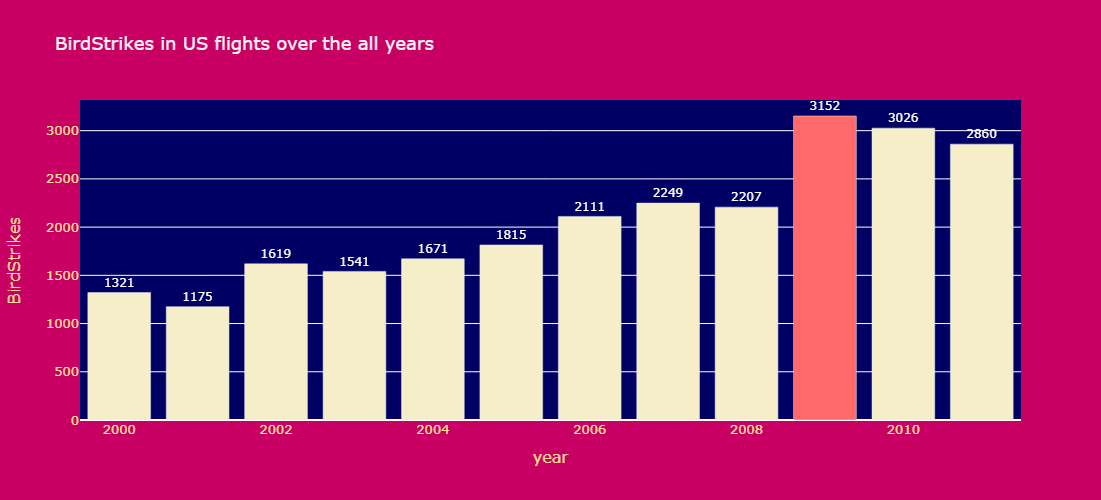

In [35]:
# use Year_dict keys and values in dict. year_wise
year_wise = {'year':Year_dict.keys(),'BirdStrikes':Year_dict.values()}

# Chnge The color of marker on threshold 
colors = ChangeColors(list(Year_dict.values()),1000)

# Create bar chart
fig = px.bar(year_wise,x='year',y='BirdStrikes',height = 500,title = 'BirdStrikes in US flights over the all years',text='BirdStrikes')

# Update text
fig.update_traces(textfont_size=12, textangle = 0, textposition='outside',cliponaxis=False,textfont=dict(color='white'),marker_color=colors)

# Update layout
fig.update_layout(paper_bgcolor = 'rgba(200, 0, 100, 222)',title_font_color="#F9F5F6",plot_bgcolor = 'rgba(0, 0, 100, 222)',legend_title_font_color='rgba(200, 200, 50, 222)',font_color='#FFE194',hoverlabel_grouptitlefont_color='#5755FE'
                  ,font_size=13)
# Show Chart
fig.show()

KeyInsights :-  In above chart we can see that between year 2000-2008 little bit differences on numbers of birdstrikes but after year 2008 in 2009(red marker) there around 1000 bird strikes increased that usually we have not seen in past years.

# ● Top 10 US Airlines in terms of having encountered bird strikes

In [36]:
print("Top 10 US airlines in terms of having encountered bird strikes:-")
Top10US = BirdStrikeOrg['Aircraft: Airline/Operator'].value_counts()

Top10US[:10]

Top 10 US airlines in terms of having encountered bird strikes:-


Aircraft: Airline/Operator
SOUTHWEST AIRLINES         4628
BUSINESS                   3074
AMERICAN AIRLINES          2058
DELTA AIR LINES            1349
AMERICAN EAGLE AIRLINES     932
SKYWEST AIRLINES            891
US AIRWAYS*                 797
JETBLUE AIRWAYS             708
UPS AIRLINES                590
US AIRWAYS                  540
Name: count, dtype: int64

In [37]:
Top10US = Top10US[:10].to_dict()

In [2]:

# use Year_dict keys and values in dict. Top10US
Top10US ={'airline':list(Top10US.keys()),'BirdStrikes':list(Top10US.values())}

# Create bar chart with Plotly Express
fig = px.bar(Top10US, x='airline', y='BirdStrikes', height=500, title='Top 10 US airlines in terms of having encountered bird strikes', text='BirdStrikes')

# URL of a image
image_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/9/91/N24976%40PEK_%2820200421150836%29.jpg/1200px-N24976%40PEK_%2820200421150836%29.jpg'


# set color to all markers
colors = ['#B3E2A7'] * len(Top10US['airline'])


# Add image as background
fig.add_layout_image(
    dict(
        source=image_url,
        xref="paper",
        yref="paper",
        x=0,
        y=1,
        sizex=1,  # Adjust width
        sizey=2,  # Adjust height
        sizing="stretch",
        opacity=0.5,
        layer="below"
    )
)

fig.update_layout(paper_bgcolor = '#5C88C4',title_font_color="#F9F5F6",plot_bgcolor = 'rgba(0, 0, 100, 100)',legend_title_font_color='rgba(200, 200, 50, 222)',font_color='#C3FF93',hoverlabel_grouptitlefont_color='#FF8F00'
                  ,font_size=13)



# Update layout to ensure the image covers the full background
fig.update_layout(
    template="plotly_white",
    images=[dict(
        source=image_url,
        xref="paper",
        yref="paper",
        x=0,
        y=1,
        sizex=1,
        sizey=2,
        sizing="stretch",
        opacity=0.4,
        layer="below"
    )],
    margin=dict(l=0, r=0, t=50, b=0)  )

# Update text
fig.update_traces(textfont_size=12, textangle = 0, textposition='outside',cliponaxis=False,textfont= dict(color='white'),marker_color=colors)

# Show chart

fig.show()


NameError: name 'Top10US' is not defined

 # ●  Top 50 Airports with most incidents of bird strikes

In [39]:
print("Top 50 Airports with most incidents of bird strikes:-")
Top50Airport = BirdStrike['Airport: Name'].value_counts()[:50]

print(Top50Airport)

Top 50 Airports with most incidents of bird strikes:-
Airport: Name
DALLAS/FORT WORTH INTL ARPT               802
SACRAMENTO INTL                           676
SALT LAKE CITY INTL                       479
DENVER INTL AIRPORT                       476
KANSAS CITY INTL                          452
PHILADELPHIA INTL                         442
ORLANDO INTL                              408
BALTIMORE WASH INTL                       401
LOUISVILLE INTL ARPT                      394
JOHN F KENNEDY INTL                       389
CHARLOTTE/DOUGLAS INTL ARPT               367
NASHVILLE INTL                            364
LAMBERT-ST LOUIS INTL                     363
CHICAGO O'HARE INTL ARPT                  331
PORTLAND INTL (OR)                        313
NEWARK LIBERTY INTL ARPT                  305
CINCINNATI/NORTHERN KENTUCKY INTL ARPT    302
ATLANTA INTL                              296
CHICAGO MIDWAY INTL ARPT                  295
HOUSTON-HOBBY                             293
DETROIT METR

In [40]:
Top50Airport = Top50Airport.to_dict()

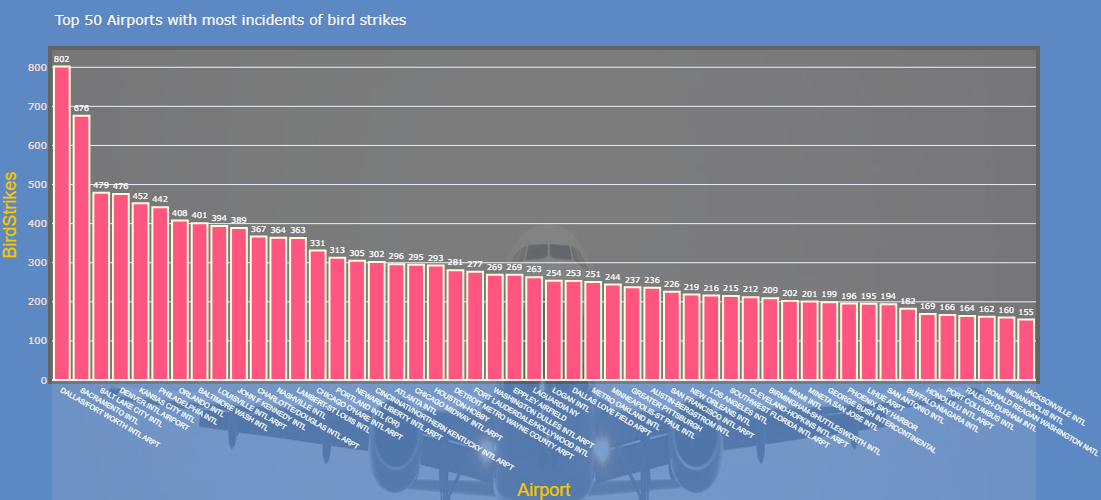

In [41]:

# use Year_dict keys and values in dict. Top10US
TopAirport ={'airport':list(Top50Airport.keys()),'BirdStrikes':list(Top50Airport.values())}

# Create bar chart with Plotly Express
fig = px.bar(TopAirport, x='airport', y='BirdStrikes', height=500, title='Top 50 Airports with most incidents of bird strikes', text='BirdStrikes')

# URL of a image
image_url = 'https://images.pexels.com/photos/358319/pexels-photo-358319.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1'


# set color to all markers
colors = ['#FF5580'] * len(TopAirport['airport'])


# Add image as background
fig.add_layout_image(
    dict(
        source=image_url,
        xref="paper",
        yref="paper",
        x=0,
        y=1,
        sizex=1,  # Adjust width
        sizey=2,  # Adjust height
        sizing="stretch",
        opacity=0.5,
        layer="below"   ))


# Update outer layout
fig.update_layout(width=1000,
    height=500,legend_borderwidth=10,margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),font=dict(color='#F5DAD2'),paper_bgcolor = '#5C88C4',legend_bgcolor='#FFDB00',title_font_color="#F9F5F6",plot_bgcolor = 'rgba(100, 100, 100, 100)',legend_title_font_color='rgba(1, 1, 50, 222)',hoverlabel_grouptitlefont_color='#FF8F00'
                  ,font_size=10)






# Update layout to ensure the image covers the full background
fig.update_layout(
    template="plotly_white",
    images=[dict(
        source=image_url,
        xref="paper",
        yref="paper",
        x=0,
        y=1,
        sizex=1,
        sizey=2,
        sizing="stretch",
        opacity=0.2,
        layer="below"
    )],
    margin=dict(l=10, r=0, t=50, b=5)  )

# Update text
fig.update_traces(textfont_size=12, textangle = 0, marker=dict(line=dict(color="#FFFBDA", width=1)),textposition='outside',cliponaxis=False,textfont= dict(color='white'),marker_color=colors, marker_line_width=2)

# Show chart


# Update the layout to change the font of the x-axis label
fig.update_xaxes(title_text="Airport", title_font=dict(family="Arial", size=18, color="#FFC700"),tickfont=dict(
        family="sans-serif",
        size=7,
        color="white"  ,
    # Change the color of the x-axis category labels
    ))


# Update the layout to change the font of the x-axis label
fig.update_yaxes(title_text="BirdStrikes", title_font=dict(family="Arial", size=18, color="#FFC700" ))


fig.show()



 # ●  Yearly Cost Incurred due to Bird Strikes

In [42]:
# Calcualte the Year from here and add in a dictionary

Year = []

Cost = []

for year in BirdStrike['year'].unique():

    CostByYear = BirdStrike[BirdStrike['year']==year]['Cost: Total $'].sum()
    
    Year.append(year)
    
    Cost.append(CostByYear)
    

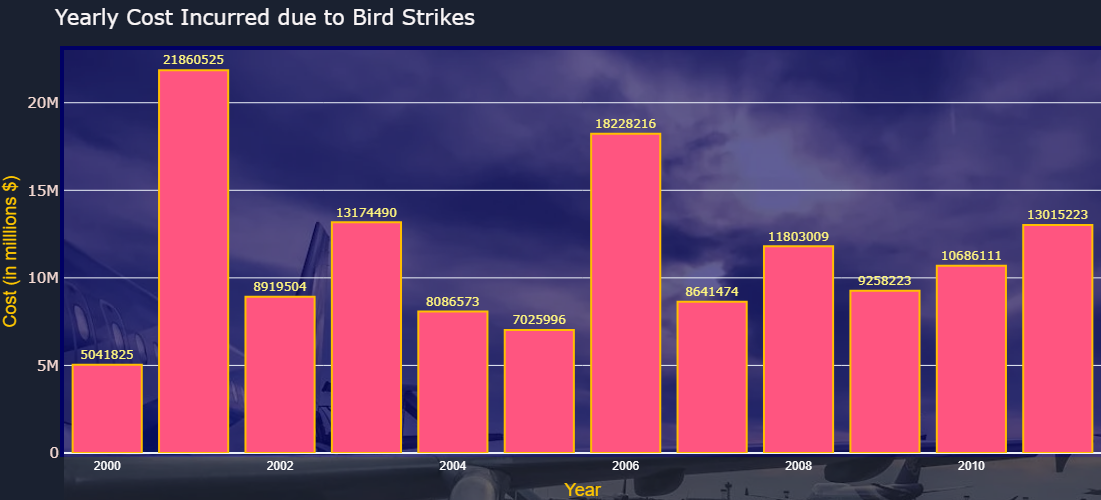

In [43]:

# use Year_dict keys and values in dict. Top10US
YearCost ={'year':Year,'cost':Cost}

# Create bar chart with Plotly Express
fig = px.bar(YearCost, x='year', y='cost', height=500, title='Yearly Cost Incurred due to Bird Strikes', text='cost')

# URL of a image
image_url = 'https://images.pexels.com/photos/912050/pexels-photo-912050.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1'


# set color to all markers
colors = ['#FF5580'] * len(YearCost['year'])


# Add image as background
fig.add_layout_image(
    dict(
        source=image_url,
        xref="paper",
        yref="paper",
        x=0,
        y=1,
        sizex=1,  # Adjust width
        sizey=2,  # Adjust height
        sizing="stretch",
        opacity=0.5,
        layer="below"   ))


# Update outer layout
fig.update_layout(width=1000,
    height=500,legend_borderwidth=10,margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),font=dict(color='#F5DAD2'),paper_bgcolor = '#1A2130',legend_bgcolor='#FFDB00',title_font_color="#F9F5F6",plot_bgcolor = 'rgba(0, 0,100, 200)',legend_title_font_color='rgba(1, 1, 50, 222)',hoverlabel_grouptitlefont_color='#FF8F00'
                  ,font_size=15)






# Update layout to ensure the image covers the full background
fig.update_layout(
    template="plotly_white",
    images=[dict(
        source=image_url,
        xref="paper",
        yref="paper",
        x=0,
        y=1,
        sizex=1,
        sizey=2,
        sizing="stretch",
        opacity=0.4,
        layer="below"
    )],
    margin=dict(l=10, r=0, t=50, b=5)  )

# Update text
fig.update_traces(textfont_size=12, textangle = 0, marker=dict(line=dict(color="#FFBF00", width=1)),textposition='outside',cliponaxis=False,textfont= dict(color='#FFF67E'),marker_color=colors, marker_line_width=2)

# Show chart


# Update the layout to change the font of the x-axis label
fig.update_xaxes(title_text="Year", title_font=dict(family="Arial", size=18, color="#FFC700"),tickfont=dict(
        family="sans-serif",
        size=12,
        color="white"  ,
    # Change the color of the x-axis category labels
    ))


# Update the layout to change the font of the x-axis label
fig.update_yaxes(title_text="Cost (in milllions $)", title_font=dict(family="Arial", size=18, color="#FFC700" ))


fig.show()

Key Insights :- year 2001 and 2006 is too costly incurred due to birdstrikes and year 2000 is less costly.

 # ● Altitude of aeroplanes at the time of strike

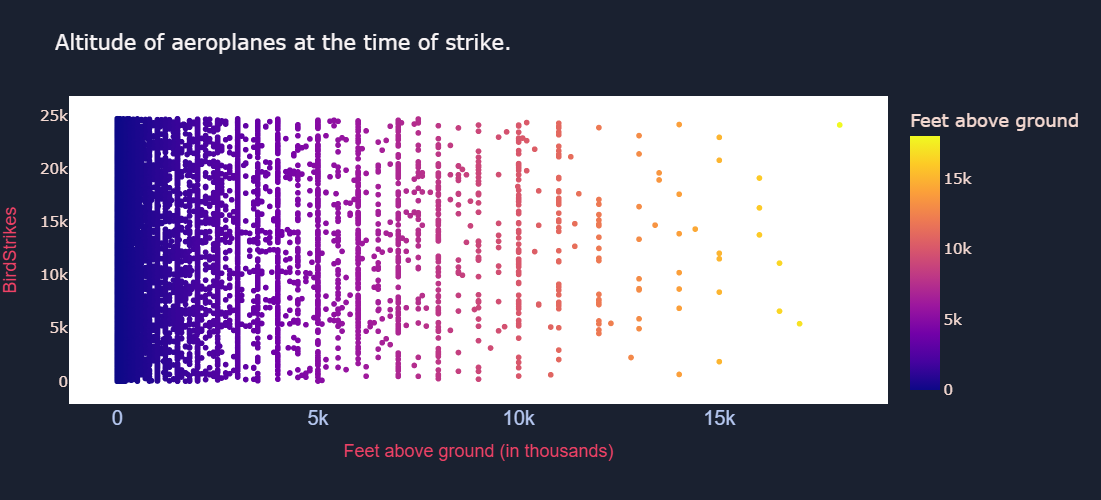

In [44]:
# use Year_dict keys and values in dict. Top10US
Altitude ={'Feet above ground':BirdStrike['Feet above ground'],'BirdStrike':[i for i in range(len(BirdStrike['Feet above ground']))] }

# Create bar chart with Plotly Express
fig = px.scatter(Altitude,height=600,x='Feet above ground',y='BirdStrike', color='Feet above ground',title='Altitude of aeroplanes at the time of strike.')

# Update the layout to change the font of the x-axis label
fig.update_xaxes(title_text="Feet above ground (in thousands)", title_font=dict(family="Arial", size=18, color="#EE4266"),tickfont=dict(
        family="sans-serif",
        size=20,
        color="#B7C9F2"  ,
    # Change the color of the x-axis category labels
    ))


# Update the layout to change the font of the x-axis label
fig.update_yaxes(title_text="BirdStrikes", title_font=dict(family="Arial", size=18, color="#EE4266" ))



# Update outer layout
fig.update_layout(width=1000,
    height=500,legend_borderwidth=10,margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),font=dict(color='#F5DAD2'),paper_bgcolor = '#1A2130',legend_bgcolor='#FFDB00',title_font_color="#F9F5F6",plot_bgcolor = 'rgba(255, 255,255, 200)',legend_title_font_color='rgba(1, 1, 50, 222)',hoverlabel_grouptitlefont_color='#FF8F00'
                  ,font_size=15)



fig.show()


Key Insights :- In above chart we found that mostly birdstrikes occur during altitude(feet above ground) of flight between 0 to 5k (thousands) feet.number of feet increasing threre are less chances of birdstrike.  

 # ● Altitude bin of aeroplanes at the time of strike

In [45]:
# Count the altitude bin
Altitude = BirdStrike['Altitude bin'].value_counts()

# Get Altitude < 1000 ft and Calculate percentage from all strikes
less_1000ft = (Altitude['< 1000 ft']/len(BirdStrike['Altitude bin'])*100).round(2)
great_1000ft = (Altitude['> 1000 ft']/len(BirdStrike['Altitude bin'])*100).round(2)

print('when Altitude bin < 1000 ft birdstrikes percentaege:- ',str(less_1000ft)+' %')
print('when Altitude bin > 1000 ft birdstrikes percentaege:- ',str(great_1000ft)+' %')

when Altitude bin < 1000 ft birdstrikes percentaege:-  80.72 %
when Altitude bin > 1000 ft birdstrikes percentaege:-  19.28 %


Key Insights:- above we can clearly see that approx 80.76 % birdstrikes occur when altitude in <1000 ft and 19.24 % strikes on > 1000 ft.

# ● Phase of flight at the time of the strike.

In [46]:
phase_count = BirdStrike['When: Phase of flight'].value_counts()

In [47]:
print("Strikes on different phases:-",phase_count)

Strikes on different phases:- When: Phase of flight
Approach        10151
Landing Roll     4946
Take-off run     4560
Climb            4247
Descent           763
Taxi               71
Parked              9
Name: count, dtype: int64


In [48]:
phase_flight = phase_count.to_dict()

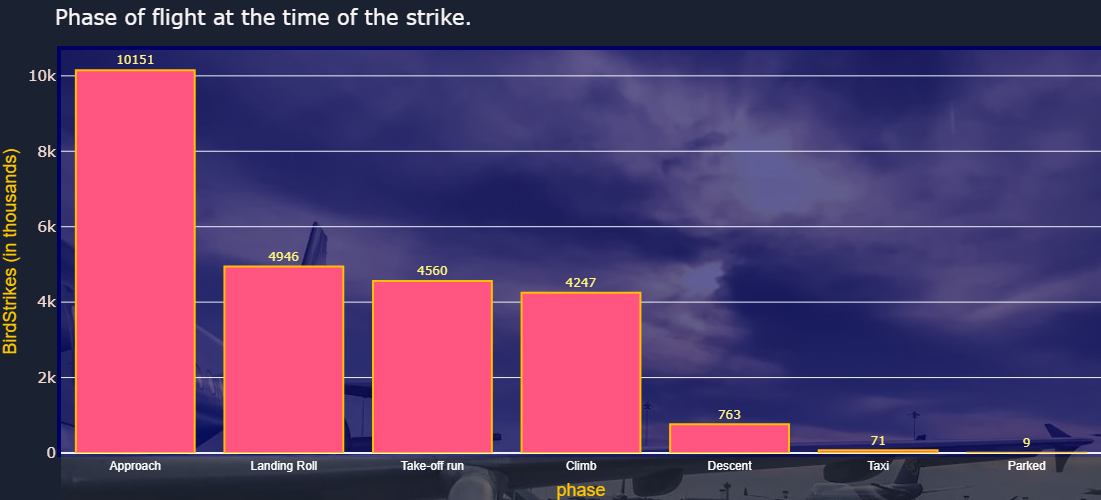

In [49]:

# use Year_dict keys and values in dict. Top10US
Phase ={'phase':phase_flight.keys(),'BirdStrikes':phase_flight.values()}

# Create bar chart with Plotly Express
fig = px.bar(Phase, x='phase', y='BirdStrikes', height=500, title='Phase of flight at the time of the strike.', text='BirdStrikes')

# URL of a image
image_url = 'https://images.pexels.com/photos/912050/pexels-photo-912050.jpeg?auto=compress&cs=tinysrgb&w=1260&h=750&dpr=1'


# set color to all markers
colors = ['#FF5580'] * len(Phase['phase'])


# Add image as background
fig.add_layout_image(
    dict(
        source=image_url,
        xref="paper",
        yref="paper",
        x=0,
        y=1,
        sizex=1,  # Adjust width
        sizey=2,  # Adjust height
        sizing="stretch",
        opacity=0.5,
        layer="below"   ))


# Update outer layout
fig.update_layout(width=1000,
    height=500,legend_borderwidth=10,margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),font=dict(color='#F5DAD2'),paper_bgcolor = '#1A2130',legend_bgcolor='#FFDB00',title_font_color="#F9F5F6",plot_bgcolor = 'rgba(0, 0,100, 200)',legend_title_font_color='rgba(1, 1, 50, 222)',hoverlabel_grouptitlefont_color='#FF8F00'
                  ,font_size=15)






# Update layout to ensure the image covers the full background
fig.update_layout(
    template="plotly_white",
    images=[dict(
        source=image_url,
        xref="paper",
        yref="paper",
        x=0,
        y=1,
        sizex=1,
        sizey=2,
        sizing="stretch",
        opacity=0.4,
        layer="below"
    )],
    margin=dict(l=10, r=0, t=50, b=5)  )

# Update text
fig.update_traces(textfont_size=12, textangle = 0, marker=dict(line=dict(color="#FFBF00", width=1)),textposition='outside',cliponaxis=False,textfont= dict(color='#FFF67E'),marker_color=colors, marker_line_width=2)

# Show chart


# Update the layout to change the font of the x-axis label
fig.update_xaxes(title_text="phase", title_font=dict(family="Arial", size=18, color="#FFC700"),tickfont=dict(
        family="sans-serif",
        size=12,
        color="white"  ,
    # Change the color of the x-axis category labels
    ))


# Update the layout to change the font of the x-axis label
fig.update_yaxes(title_text="BirdStrikes (in thousands)", title_font=dict(family="Arial", size=18, color="#FFC700" ))


fig.show()



Key Insights:- In Approach phase of flight  10205 birdstrikes occur compare to other phases.

# ● Average Altitude of the aeroplanes in different phases at the time of strike

In [50]:

# Compute the average altitude in diifer. phases
for phase in BirdStrike['When: Phase of flight'].unique():

    # Compute the mean of column Feet above ground (altitude) for the flight phase
    altitude_phase = BirdStrike[BirdStrike['When: Phase of flight']==phase]['Feet above ground'].mean()

    # print the avg. altitude in differ. phase
    print(f'in {phase.upper()} phase Average Altitude of the aeroplanes :- ',int(altitude_phase))

in CLIMB phase Average Altitude of the aeroplanes :-  1204
in LANDING ROLL phase Average Altitude of the aeroplanes :-  0
in APPROACH phase Average Altitude of the aeroplanes :-  1004
in TAKE-OFF RUN phase Average Altitude of the aeroplanes :-  0
in DESCENT phase Average Altitude of the aeroplanes :-  5924
in TAXI phase Average Altitude of the aeroplanes :-  0
in PARKED phase Average Altitude of the aeroplanes :-  0


# ● Effect of Bird Strikes & Impact on Flight

Average economical loss due to birdstrikes 

In [51]:
print("Average economical loss from year 2000-2011 due to birdstrikes effects:- ",(np.mean(YearCost['cost'])/1000000).round(2),"million $")

Average economical loss from year 2000-2011 due to birdstrikes effects:-  11.31 million $


# People injured due to birdstrikes 

In [52]:
print("people injured due to birdstrikes:- ",BirdStrike[BirdStrike['Number of people injured']!=0]['Number of people injured'].sum())

people injured due to birdstrikes:-  21


# Impact on Flight

In [53]:
# BirdStrikeOrg.dropna()[,'',Effect: Impact to flight']

In [54]:
Effect_in_flight = BirdStrikeOrg.dropna()

In [106]:
print("due to birdstrikes most chances of impact:-")     
# Calcualte the percentage chances of possible imapact on flight due to bird strikes
for (k,v) in Effect_in_flight['Effect: Impact to flight'].value_counts().to_dict().items():


            print(k,(v/(Effect_in_flight.value_counts().values.sum())*100).round(2)," %")
    


due to birdstrikes most chances of impact:-
Precautionary Landing 43.33  %
Aborted Take-off 29.44  %
Other 22.22  %
Engine Shut Down 5.0  %


Key Insights :- in above analysis we can clearly see that birdstrikes on flight can impact on financially and physically.

# ● Effect of Strike at Different Altitude

In [56]:
Effect_in_flight = Effect_in_flight[['Effect: Impact to flight','Cost: Total $','Feet above ground','Effect: Indicated Damage']].sort_values(by = 'Feet above ground')


In [57]:
# Change Data type with replace , character
Effect_in_flight['Feet above ground'] = Effect_in_flight['Feet above ground'].astype(str).str.replace(",","").astype(int)


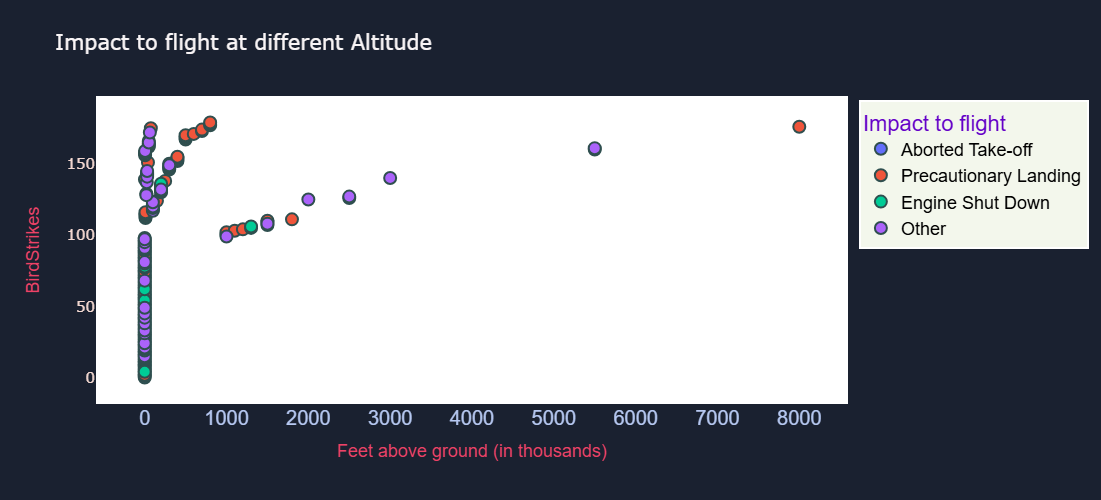

In [58]:
# Create a dictionary for visualization of data
Altitude ={'Feet above ground':Effect_in_flight['Feet above ground'],'BirdStrike':[i for i in range(len(Effect_in_flight['Feet above ground']))] }

# Create bar chart with Plotly Express
fig = px.scatter(Altitude,height=600,x='Feet above ground',y='BirdStrike',color = Effect_in_flight['Effect: Impact to flight'],title='Impact to flight at different Altitude')


# Update the layout to change the font of the x-axis label
fig.update_xaxes(title_text="Feet above ground (in thousands)", title_font=dict(family="Arial", size=18, color="#EE4266"),tickfont=dict(
        family="sans-serif",
        size=20,
        color="#B7C9F2",
    # Change the color of the x-axis category labels
    ))


# Update the layout to change the font of the x-axis label
fig.update_yaxes(title_text="BirdStrikes", title_font=dict(family="Arial", size=18, color="#EE4266" ))



# Update outer layout
fig.update_layout(legend=dict(title="Impact to flight",
        font=dict(
            family="Arial",
            size=18,
            color="black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="white",
        borderwidth=2
    ),width=1000,
    height=500,legend_borderwidth=2,margin=dict(
        l=100,
        r=50,
        b=100,
        t=100,
        pad=4
    ),font=dict(color='#F5DAD2'),paper_bgcolor = '#1A2130',legend_bgcolor='#F3F7EC',title_font_color="#F9F5F6",plot_bgcolor = 'rgba(255, 255,255, 200)',legend_title_font_color='rgba(100,0, 200, 200)',hoverlabel_grouptitlefont_color='#1A2130'
                  ,font_size=15)


fig.update_traces(marker=dict(size=12,
                              line=dict(width = 2,
                                        color = 'DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

In [59]:
BirdStrike.columns

Index(['Record ID', 'Aircraft: Type', 'Airport: Name', 'Altitude bin',
       'Aircraft: Make/Model', 'Wildlife: Number struck',
       'Wildlife: Number Struck Actual', 'FlightDate',
       'Effect: Indicated Damage', 'Aircraft: Number of engines?',
       'Aircraft: Airline/Operator', 'Origin State', 'When: Phase of flight',
       'Remains of wildlife collected?',
       'Remains of wildlife sent to Smithsonian', 'Wildlife: Size',
       'Conditions: Sky', 'Wildlife: Species',
       'Pilot warned of birds or wildlife?', 'Cost: Total $',
       'Feet above ground', 'Number of people injured', 'Is Aircraft Large?',
       'year', 'month', 'year_month'],
      dtype='object')

Key Insights:- above chart we have found that on altitude 0 most birdstrikes occur and there are more impact to flight compare to other altitude. 

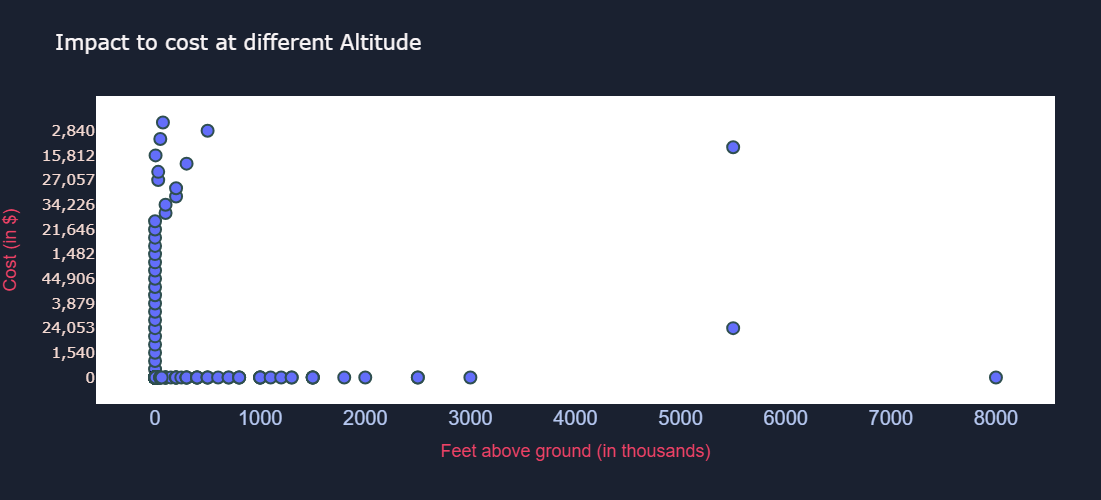

In [60]:
# Create a dictionary for visualization of data
Altitude ={'Feet above ground':Effect_in_flight['Feet above ground'],'BirdStrike':[i for i in range(len(Effect_in_flight['Feet above ground']))] }

# Create bar chart with Plotly Express
fig = px.scatter(Effect_in_flight[['Feet above ground','Cost: Total $']],height=600,x='Feet above ground',y=  'Cost: Total $',title='Impact to cost at different Altitude')


# Update the layout to change the font of the x-axis label
fig.update_xaxes(title_text="Feet above ground (in thousands)", title_font=dict(family="Arial", size=18, color="#EE4266"),tickfont=dict(
        family="sans-serif",
        size=20,
        color="#B7C9F2",
    # Change the color of the x-axis category labels
    ))


# Update the layout to change the font of the x-axis label
fig.update_yaxes(title_text="Cost (in $)", title_font=dict(family="Arial", size=18, color="#EE4266" ))



# Update outer layout
fig.update_layout(legend=dict(title="Impact to flight",
        font=dict(
            family="Arial",
            size=18,
            color="black"
        ),
        bgcolor="LightSteelBlue",
        bordercolor="white",
        borderwidth=2
    ),width=1000,
    height=500,legend_borderwidth=2,margin=dict(
        l=100,
        r=50,
        b=100,
        t=100,
        pad=4
    ),font=dict(color='#F5DAD2'),paper_bgcolor = '#1A2130',legend_bgcolor='#F3F7EC',title_font_color="#F9F5F6",plot_bgcolor = 'rgba(255, 255,255, 200)',legend_title_font_color='rgba(100,0, 200, 200)',hoverlabel_grouptitlefont_color='#1A2130'
                  ,font_size=15)


fig.update_traces(marker=dict(size=12,
                              line=dict(width = 2,
                                        color = 'DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

Key Insights:- In above result we found that on between altitude 0-2000 too high cost due to bird strike effects.

 # ● Were Pilots Informed? & Prior Warning and Effect of Strike Relation


In [61]:
pilot_inform = BirdStrikeOrg[['Effect: Impact to flight','Pilot warned of birds or wildlife?','Cost: Total $','Effect: Indicated Damage']].dropna()

In [62]:
# Check for pilots informed/warned or not
pilot_inform['Cost: Total $'] = pilot_inform['Cost: Total $'].astype(str).str.replace(",","").astype(int)

In [63]:
cost_y = pilot_inform[pilot_inform['Pilot warned of birds or wildlife?']=='Y']['Cost: Total $'].sum()/1000000

print("cost when pilot informed:- ",cost_y,"Million $")

cost when pilot informed:-  47.210472 Million $


In [64]:
cost_n = pilot_inform[pilot_inform['Pilot warned of birds or wildlife?']=='N']['Cost: Total $'].sum()/1000000

print("cost when pilot not informed:- ",cost_n,"Million $")

cost when pilot not informed:-  59.121748 Million $


In [65]:
flight_damage_y = pilot_inform[pilot_inform['Pilot warned of birds or wildlife?']=='Y']['Effect: Indicated Damage'].value_counts()
print("damage indicated when pilot informed:_",flight_damage_y)

damage indicated when pilot informed:_ Effect: Indicated Damage
No damage        516
Caused damage    393
Name: count, dtype: int64


In [66]:
flight_damage_n = pilot_inform[pilot_inform['Pilot warned of birds or wildlife?']=='N']['Effect: Indicated Damage'].value_counts()

print("damage indicated when pilot not informed:_",flight_damage_n)

damage indicated when pilot not informed:_ Effect: Indicated Damage
No damage        651
Caused damage    518
Name: count, dtype: int64


In [67]:
impact_flight_y = pilot_inform[pilot_inform['Pilot warned of birds or wildlife?']=='Y']['Effect: Impact to flight'].value_counts()


print("Impact to flight when pilot informed:- ",impact_flight_y)

Impact to flight when pilot informed:-  Effect: Impact to flight
Precautionary Landing    502
Aborted Take-off         229
Other                    142
Engine Shut Down          36
Name: count, dtype: int64


In [68]:
impact_flight_n = pilot_inform[pilot_inform['Pilot warned of birds or wildlife?']=='N']['Effect: Impact to flight'].value_counts()
print("Impact to flight when pilot not informed:- ",impact_flight_n)

Impact to flight when pilot not informed:-  Effect: Impact to flight
Precautionary Landing    619
Aborted Take-off         250
Other                    248
Engine Shut Down          52
Name: count, dtype: int64


Key Insights:- In Above result of analysis we found that birdstrikes impact on cost ,flight damage,and other damage can be decreasable by prior waring to pilot about the strike.in cost effect we have found there around 12 million loss of cost has decreased,on 100 birdstriks there are no damage.  

## >>Project Summary

In overall analysis we haave found mostly birdstrikes occur between altitude 0-1000 above to ground.we also describe the all cases we have analyze in past process.

# Conclusion:-

If pilot prior warned about the birdstrike event we can decrease the cost and impact due to birdstrikes,there are seasonal changes in birdstrikes in winter season we found number of birdstrikes go down.